# Hochschule Bonn-Rhein-Sieg

# Neural Networks, WS17/18

# Assignment 02 (16-October-2017)

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing(use_latex=True)
from IPython.display import Image

---
## Question 1: Read chapter 2 from Haykin’s book until 2.13 (leaving out Statistical learning theory to end of chapter) and summarize or sketch your insights in mind-map or an outline or a summary. 

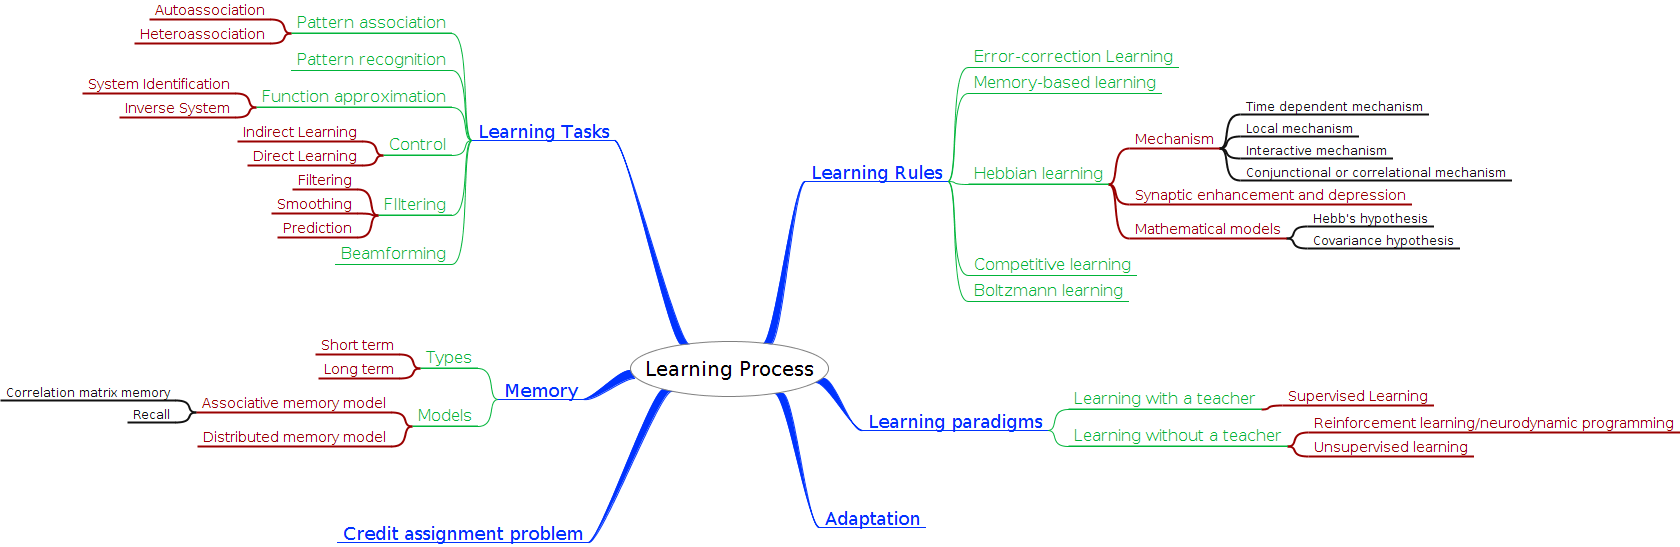

In [2]:
Image("Images/HaykinChapter2_mindmap.png")

---
## Question 3: Do the problem 1.13 (Network architecture) from the previous week’s assignment. This time use Python’s (sympy) symbolic toolbox. Finally assume the network presented in fig P1.13 is a binary-classifier, please depict how the input space (R2) is classified on a 2D graph using different colors. 

#### 1.13 (a):  Figure P1.13 shows the signal-flow graph of a 2-2-2-1 feedforward network. The function $\varphi(\cdot)$ denotes a logistic function. Write the input/output mapping defined by this network.

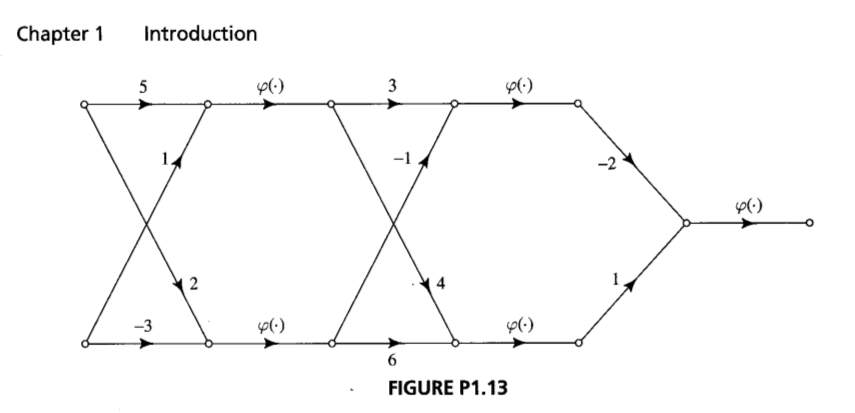

In [3]:
Image("Images/ScreenshotP113.png") #screenshot from Haykin’s book, Chapter 1b

In [4]:
#defining inputs (x1,x2) and logistic function (phi)
x1,x2,v=sp.symbols('x1,x2,v')
phi = 1/(1+sp.exp(-1*v)) #Using logistic function from 1.1

#defining hidden layers
hidden_layer_11 = phi.subs(v,5*x1+x2)
hidden_layer_12 = phi.subs(v,2*x1-3*x2)
hidden_layer_21 = phi.subs(v,3*hidden_layer_11-hidden_layer_12)
hidden_layer_22 = phi.subs(v,4*hidden_layer_11+6*hidden_layer_12)

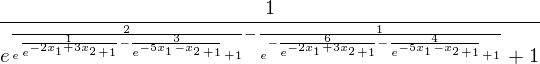

In [5]:
output_layer=phi.subs(v,-2*hidden_layer_21+hidden_layer_22)
output_layer

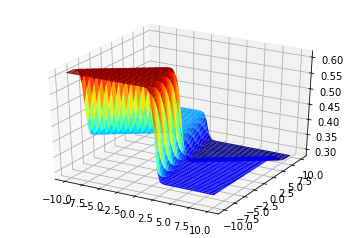

In [6]:
sp.plotting.plot3d(output_layer)

#### 1.13 (b):  Suppose the output neuron in the signal-flow graph for Figure P1.13 operates in the linear region. Write the linear input-output mapping defined by this new  network.

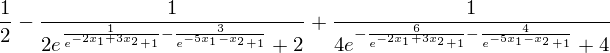

In [7]:
#Slope of the logistic function is
phi_prime=sp.diff(phi,v)
phi_prime_0=phi_prime.subs(v,0) #slope at origin ---slope
phi_0=phi.subs(v,0) #function value at 0 ---intercept

#For a linear signal, output=slope*x+intercept
#So, using this for the output layer

output_layer=phi_prime_0*(-2*hidden_layer_21+hidden_layer_22)+phi_0
output_layer

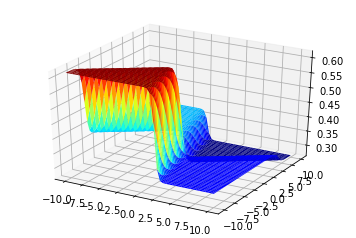

In [8]:
sp.plotting.plot3d(output_layer)

#### Assume the network presented in fig P1.13 is a binary-classifier, please depict how the input space (R2) is classified on a 2D graph using different colors. 

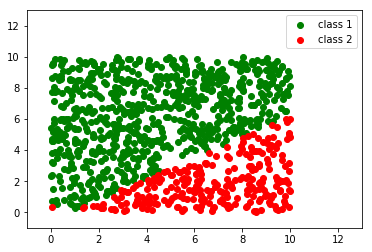

In [9]:
"""
Taking 100 random values X1 and X2 each.

We will use the binary classifier from above to 
divide the points (X1,X2) into two classes.
"""
output_layer_copy=output_layer
x_1=np.random.rand(1000)*10
x_2=np.random.rand(1000)*10


y=np.zeros(1000)
c1=[]
c2=[]

for i in xrange(1000):
    y[i]=output_layer_copy.subs({x1:x_1[i],x2:x_2[i]})
    
    #classify to class1 if y is<0.3, else class2
    if y[i]<0.3:
        c1.append([x_1[i],x_2[i]])
    else:
        c2.append([x_1[i],x_2[i]])
c1=np.array(c1)
c2=np.array(c2)

plt.scatter(c1[:,0],c1[:,1],color='g', label='class 1')
plt.scatter(c2[:,0],c2[:,1],color='r', label='class 2')
plt.xlim(-1,13)
plt.ylim(-1,13)
plt.legend()
plt.show()

---
## Question 4: Adjust the data at the "New Classification Example (now *with* bias)" slide, such that a bais becomes necessary (not 0). Validate the perceptron learning algorithm. 

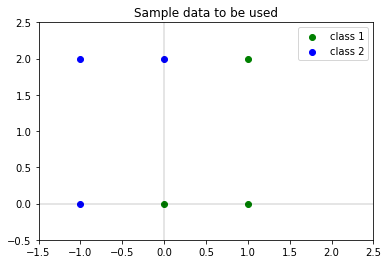

In [10]:
"""
Setting up sample data
"""
C1=np.array(([1,2],[1,0],[0,0]))     #class 1
C2=np.array(([-1,0],[-1,2],[0,2]))   #class -1

plt.scatter(C1[:,0], C1[:,1],label='class 1', color='g')
plt.scatter(C2[:,0], C2[:,1],label='class 2', color='b')
plt.plot([0,0],[-3,3],color='black', linewidth=0.2)
plt.plot([-3,3],[0,0],color='black', linewidth=0.2)
plt.xlim(-1.5,2.5)
plt.ylim(-0.5,2.5)
plt.title('Sample data to be used')
plt.legend()
plt.show()

In [11]:
"""
Using perceptron learning algorithm to classify
the above data.
"""
C1_dash=np.array(([1,1,2],[1,1,0],[1,0,0]))     
C2_dash=np.array(([-1,1,0],[-1,1,-2],[-1,0,-2]))  
C=np.vstack((C1_dash,C2_dash))

w=np.array(([1,0,0]))[np.newaxis].T #initial weights
eta=1                               #learning rate

flag=True
count=0

print "----------"
while(flag):
    count+=1
    flag=False
    for i,val in enumerate(C):
        val=val[np.newaxis].T
        #print "w: ",w.T
        if w.T.dot(val)<=0:
            w=w+eta*(val)
            
            """
            since there was an update of the weights,
            so, proceed to next epoch.
            set "flag" to "True"
            """
            flag=True
            
    #print "Ending Epoch ", count
    #print "----------"

w=w.T
print ""
print ""
print "Final weight vector: ",w
print "Total number of iterations needed: ",count
print"-----------"
x1,x2=sp.symbols('x1,x2')
eq=w[0,1]*x1+w[0,2]*x2+ w[0,0]
print "Equation of Decision hyperplane is: \n"
eq

----------


Final weight vector:  [[ 1  5 -2]]
Total number of iterations needed:  7
-----------
Equation of Decision hyperplane is: 



Equation of the hyperplane is given by:

$$w_1\cdot x_1+w_2\cdot x_2+c=0$$
So,
$$x_2=\frac{-w_1\cdot x_1-c}{w_2}$$

Here,

$w_1= w[0,1]=5$, 

$w_2= w[0,2]=-2$,

$c= w[0,0] = 1$


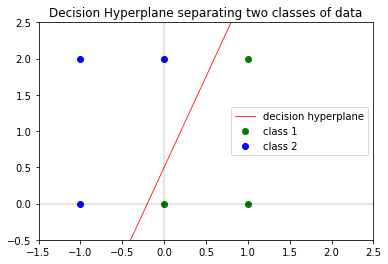

In [12]:
x1=np.linspace(-1,1,3)
x2=(-w[0,1]*x1- w[0,0])/w[0,2]

fig, ax = plt.subplots()
plt.plot(x1,x2,label='decision hyperplane',color='r', linewidth=0.8)
plt.scatter(C1[:,0], C1[:,1],label='class 1', color='g')
plt.scatter(C2[:,0], C2[:,1],label='class 2', color='b')
plt.plot([0,0],[-3,3],color='black', linewidth=0.2)
plt.plot([-3,3],[0,0],color='black', linewidth=0.2)
plt.xlim(-1.5,2.5)
plt.ylim(-0.5,2.5)
plt.title('Decision Hyperplane separating two classes of data')
plt.legend()
plt.show()

From the above graph, we see that the decision hyperplane divides the two classes.

---